In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:

import pandas as pd
import numpy as np
import random
import os
from tqdm.notebook import tqdm
from sklearn.metrics import root_mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [14]:
SEED = 1044
random.seed(SEED)
np.random.seed(SEED)

In [15]:
DATA_PATH = 'D:/Python project'

train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))
samplesubmission = pd.read_csv(os.path.join(DATA_PATH, 'sample_submission.csv'))

train.head(10)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51000,29.29000,2019,0,-0.00011,0.60302,-0.00007,0.25567,-98.59389,...,3664.43622,61085.80957,2615.12048,15.56853,0.27229,-12.62899,35.63242,-138.78642,30.75214,3.75099
1,ID_-0.510_29.290_2019_01,-0.51000,29.29000,2019,1,0.00002,0.72821,0.00001,0.13099,16.59286,...,3651.19031,66969.47873,3174.57242,8.69060,0.25683,30.35938,39.55763,-145.18393,27.25178,4.02518
2,ID_-0.510_29.290_2019_02,-0.51000,29.29000,2019,2,0.00051,0.74820,0.00038,0.11002,72.79584,...,4216.98649,60068.89445,3516.28267,21.10341,0.25110,15.37788,30.40182,-142.51954,26.19330,4.23138
3,ID_-0.510_29.290_2019_03,-0.51000,29.29000,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.50774,51064.54734,4180.97332,15.38690,0.26204,-11.29340,24.38036,-132.66583,28.82915,4.30529
4,ID_-0.510_29.290_2019_04,-0.51000,29.29000,2019,4,-0.00008,0.67630,-0.00005,0.12116,4.12127,...,3980.59812,63751.12578,3355.71011,8.11469,0.23585,38.53226,37.39298,-141.50981,22.20461,4.34732
5,ID_-0.510_29.290_2019_05,-0.51000,29.29000,2019,5,0.00029,0.87171,0.00024,0.22766,-13.45369,...,5530.35455,49846.00101,4495.30136,7.55614,0.25023,30.12840,37.00702,-137.38872,21.15782,4.31082
6,ID_-0.510_29.290_2019_06,-0.51000,29.29000,2019,6,-0.00029,0.79196,-0.00023,0.11940,72.19865,...,4378.61465,58804.27656,3537.05066,10.49311,0.24083,4.58537,30.49154,-128.19634,21.72120,4.26933
7,ID_-0.510_29.290_2019_07,-0.51000,29.29000,2019,7,-0.00002,0.97631,-0.00002,0.10680,-100.95605,...,3468.92415,63697.00727,2597.07156,20.53360,0.25017,16.37483,35.84025,-122.25070,20.43201,4.25136
8,ID_-0.510_29.290_2019_08,-0.51000,29.29000,2019,8,-0.00011,0.79694,-0.00010,0.16497,-40.17907,...,3160.26467,67222.55616,2530.85148,24.25393,0.26054,-12.02175,42.68879,-114.29637,22.36560,4.28194
9,ID_-0.510_29.290_2019_09,-0.51000,29.29000,2019,9,0.00006,0.99854,0.00001,0.15773,-100.10874,...,4141.07334,60298.71797,3510.29365,13.81338,0.28929,-66.25839,28.59621,-105.68718,21.08402,4.35293


In [16]:
train.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.00000,79023.00000,79023.00000,79023.00000,64414.00000,64414.00000,64414.00000,64414.00000,64414.00000,64414.00000,...,78539.00000,78539.00000,78539.00000,78539.00000,78539.00000,78539.00000,78539.00000,78539.00000,78539.00000,79023.00000
mean,-1.89107,29.88015,2020.00000,26.00000,0.00005,0.83485,0.00004,0.15842,-7.92587,37.43619,...,5592.37748,59420.29746,4670.43087,19.13924,0.27146,-10.78483,40.43698,-86.80058,27.92598,81.94055
std,0.69452,0.81038,0.81650,15.29716,0.00027,0.18538,0.00021,0.07136,64.26337,14.14995,...,1428.50300,9051.16361,1359.25158,13.54705,0.04943,30.37446,6.42822,37.83727,4.40384,144.29965
min,-3.29900,28.22800,2019.00000,0.00000,-0.00100,0.24182,-0.00089,0.00000,-179.53706,0.09924,...,1050.66178,24779.03370,1050.49682,1.84453,0.01770,-102.73973,2.99887,-153.46421,10.81829,0.00000
25%,-2.45100,29.26200,2019.00000,13.00000,-0.00010,0.70582,-0.00008,0.11053,-56.78238,28.84452,...,4595.40052,53175.77993,3680.85634,9.97457,0.24145,-30.30917,35.82991,-125.99116,24.68676,9.79800
50%,-1.88200,29.88300,2020.00000,26.00000,0.00002,0.80912,0.00002,0.16185,-12.44173,37.78430,...,5573.85431,59332.53255,4621.75517,15.13069,0.27275,-12.67391,41.11963,-84.64435,28.33363,45.59345
75%,-1.30300,30.47100,2021.00000,39.00000,0.00015,0.94279,0.00012,0.21182,72.05999,47.63488,...,6542.30364,65663.84268,5572.98322,23.78503,0.30289,9.40220,44.44627,-48.13270,31.49988,109.54959
max,-0.51000,31.53200,2021.00000,52.00000,0.00419,1.88524,0.00424,0.30000,122.09520,66.24201,...,12384.23946,89291.61558,11384.23946,250.00000,0.73651,78.22304,65.95125,-22.65317,42.06044,3167.76800


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [18]:
train.shape , test.shape

((79023, 76), (24353, 75))

In [19]:
train['location'] = [str(x) + '_' + str(y) for x, y in zip(train.latitude, train.longitude)]

In [20]:
train.tail(10)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,location
79013,ID_-3.299_30.301_2021_43,-3.29900,30.30100,2021,43,0.00029,1.07592,0.00026,0.23532,-99.11052,...,56710.31906,5310.88574,19.69245,0.25550,-25.50514,34.77413,-112.50631,28.91040,30.14167,-3.299_30.301
79014,ID_-3.299_30.301_2021_44,-3.29900,30.30100,2021,44,0.00021,1.05241,0.00022,0.29162,73.35268,...,55212.54393,5281.30856,15.66585,0.23753,-12.66457,41.93460,-116.85987,30.02527,29.34627,-3.299_30.301
79015,ID_-3.299_30.301_2021_45,-3.29900,30.30100,2021,45,0.00005,1.26969,0.00004,0.18152,15.94933,...,53669.02018,5540.47644,11.78592,0.25839,15.87161,54.06942,-124.56576,28.26804,29.68860,-3.299_30.301
79016,ID_-3.299_30.301_2021_46,-3.29900,30.30100,2021,46,-0.00008,1.17124,-0.00011,0.19379,-12.54333,...,61586.79780,4370.49312,13.43024,0.25635,-61.97706,25.85088,-123.07913,31.71041,29.70136,-3.299_30.301
79017,ID_-3.299_30.301_2021_47,-3.29900,30.30100,2021,47,-0.00026,0.66869,-0.00017,0.25796,71.89173,...,53218.91820,5894.66797,25.12404,0.30830,24.64899,38.73651,-129.93365,29.49953,30.29763,-3.299_30.301
79018,ID_-3.299_30.301_2021_48,-3.29900,30.30100,2021,48,0.00028,1.19564,0.00034,0.19131,72.82052,...,60657.10191,4590.87950,20.24595,0.30480,-35.14037,40.11353,-129.93551,32.09521,29.40417,-3.299_30.301
79019,ID_-3.299_30.301_2021_49,-3.29900,30.30100,2021,49,0.00008,1.13087,0.00006,0.17722,-12.85675,...,60168.19153,4659.13038,6.10461,0.31401,4.66706,47.52844,-134.25287,30.77147,29.18650,-3.299_30.301
79020,ID_-3.299_30.301_2021_50,-3.29900,30.30100,2021,50,NaN,NaN,NaN,NaN,NaN,...,56596.02721,5222.64682,14.81789,0.28806,-0.34092,35.32810,-134.73172,30.71617,29.13121,-3.299_30.301
79021,ID_-3.299_30.301_2021_51,-3.29900,30.30100,2021,51,-0.00003,0.87940,-0.00003,0.18421,-100.34483,...,46533.34819,6946.85802,32.59477,0.27405,8.42770,48.29565,-139.44785,29.11287,28.12579,-3.299_30.301
79022,ID_-3.299_30.301_2021_52,-3.29900,30.30100,2021,52,-0.00009,0.87195,-0.00008,0.00000,76.82564,...,47771.68189,6553.29502,19.46403,0.22628,-12.80853,47.92344,-136.29998,30.24639,27.23930,-3.299_30.301


In [21]:
exampleLoc = train[train.location == '-3.299_30.301']

rollmean = exampleLoc['SulphurDioxide_SO2_column_number_density_amf'].rolling(window=2).mean()

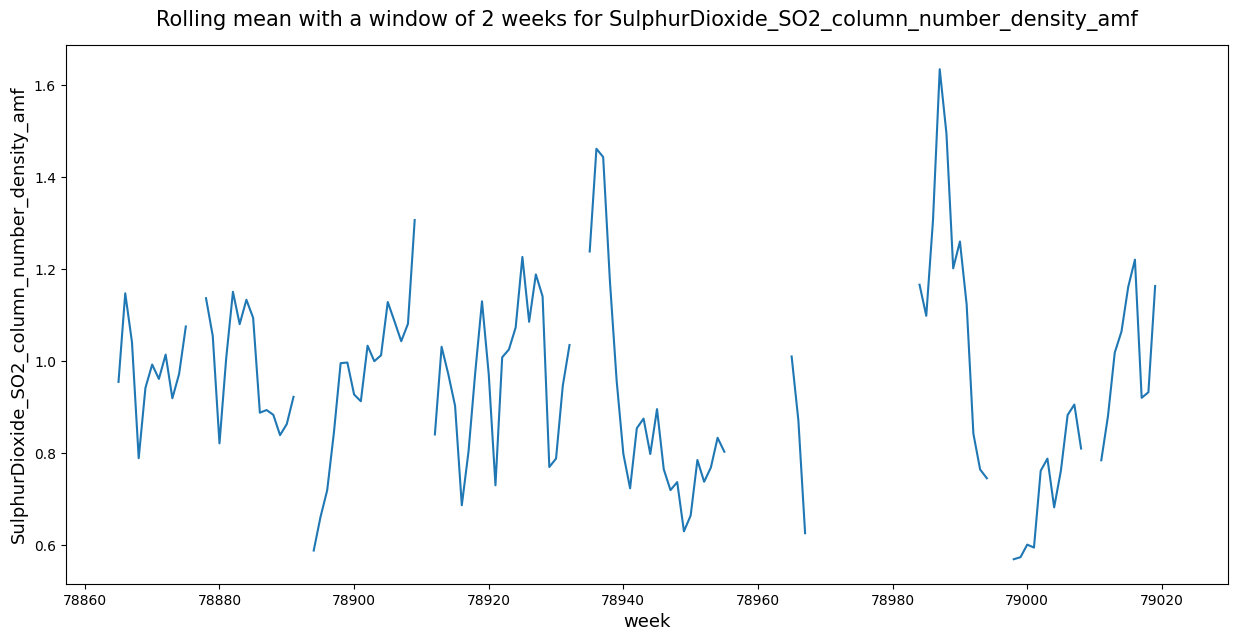

In [22]:
plt.figure(figsize=(15, 7))
rollmean.plot()
plt.title('Rolling mean with a window of 2 weeks for SulphurDioxide_SO2_column_number_density_amf', y=1.02, fontsize=15)
plt.xlabel('week', y=1.05, fontsize=13)
plt.ylabel('SulphurDioxide_SO2_column_number_density_amf', x=1.05, fontsize=13)
plt.show()

In [23]:
train_roll_mean = train.sort_values(by = ['location', 'year', 'week_no']).groupby(['location'])[train.columns[5:].tolist()].rolling(window = 2).mean().reset_index()
train_roll_mean.drop(['level_1', 'emission', 'location'], axis = 1, inplace = True)
train_roll_mean.columns = [col + '_roll_mean' for col in train_roll_mean.columns]


test.latitude, test.longitude = round(test.latitude, 2), round(test.longitude, 2)
test['location'] = [str(x) + '_' + str(y) for x, y in zip(test.latitude, test.longitude)]
test_roll_mean = test.sort_values(by = ['location', 'year', 'week_no']).groupby(['location'])[test.columns[5:].tolist()].rolling(window = 2).mean().reset_index()
test_roll_mean.drop(['level_1', 'location'], axis = 1, inplace = True)
test_roll_mean.columns =  [col + '_roll_mean' for col in test_roll_mean.columns]
test_roll_mean.head()


,SulphurDioxide_SO2_column_number_density_roll_mean,SulphurDioxide_SO2_column_number_density_amf_roll_mean,SulphurDioxide_SO2_slant_column_number_density_roll_mean,SulphurDioxide_cloud_fraction_roll_mean,SulphurDioxide_sensor_azimuth_angle_roll_mean,SulphurDioxide_sensor_zenith_angle_roll_mean,SulphurDioxide_solar_azimuth_angle_roll_mean,SulphurDioxide_solar_zenith_angle_roll_mean,SulphurDioxide_SO2_column_number_density_15km_roll_mean,CarbonMonoxide_CO_column_number_density_roll_mean,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42280.88229,7474.23040,47981.82304,6474.23032,9.69203,0.26695,-65.31206,38.04982,-135.84018,32.39598
2,0.00031,0.64814,0.00021,0.03993,17.09193,27.74483,-138.71941,29.47540,0.00011,0.03772,...,41336.40886,7730.47151,46960.90116,6730.47143,11.10081,0.28012,4.28852,44.16954,-141.70891,28.87787
3,0.00026,0.65101,0.00017,0.14045,15.05711,49.37580,-144.95421,25.93065,0.00007,0.03877,...,42494.03577,7499.75988,48326.23106,6499.75991,11.25887,0.28590,7.31112,44.03845,-139.90644,28.17407
4,0.00002,0.63872,0.00003,0.20269,74.18022,37.25428,-144.39710,23.06746,0.00001,0.03949,...,48724.83811,6432.00227,55271.45512,5432.00225,12.41494,0.29445,-18.68649,36.13153,-135.26400,27.94079


In [24]:
train_eng = train.sort_values(by = ['location', 'year', 'week_no'], ignore_index = True).merge(train_roll_mean, how = 'left',
                                                                                               left_index=True, right_index=True)
test_eng = test.sort_values(by = ['location', 'year', 'week_no'], ignore_index = True).merge(test_roll_mean, how = 'left',
                                                                                               left_index=True, right_index=True)
test_eng.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
0,ID_-0.510_29.290_2022_00,-0.51000,29.29000,2022,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_-0.510_29.290_2022_01,-0.51000,29.29000,2022,1,0.00046,0.69116,0.00032,0.00000,76.23920,...,42280.88229,7474.23040,47981.82304,6474.23032,9.69203,0.26695,-65.31206,38.04982,-135.84018,32.39598
2,ID_-0.510_29.290_2022_02,-0.51000,29.29000,2022,2,0.00016,0.60511,0.00011,0.07987,-42.05534,...,41336.40886,7730.47151,46960.90116,6730.47143,11.10081,0.28012,4.28852,44.16954,-141.70891,28.87787
3,ID_-0.510_29.290_2022_03,-0.51000,29.29000,2022,3,0.00035,0.69692,0.00024,0.20103,72.16957,...,42494.03577,7499.75988,48326.23106,6499.75991,11.25887,0.28590,7.31112,44.03845,-139.90644,28.17407
4,ID_-0.510_29.290_2022_04,-0.51000,29.29000,2022,4,-0.00032,0.58053,-0.00018,0.20435,76.19086,...,48724.83811,6432.00227,55271.45512,5432.00225,12.41494,0.29445,-18.68649,36.13153,-135.26400,27.94079


In [26]:
X = train_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location', 'emission'], axis=1)
X = X.fillna(X.median())
y = train_eng.emission

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

xgb_reg = xgb.XGBRegressor(random_state=SEED, n_jobs=-1)

xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
print(f'RMSE Score: {rmse}')

RMSE Score: 24.00343449589104


In [27]:
X_test.head(10)

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
77106,-3.03200,29.16800,2021,44,0.00002,0.80912,0.00002,0.16185,-12.44173,37.78430,...,57554.98332,4961.93653,64124.34880,4060.04619,14.10632,0.24045,12.53636,31.38073,-116.04805,28.48336
68332,-2.79400,28.30600,2021,15,-0.00015,0.72613,-0.00011,0.17888,74.01825,42.08862,...,39287.04969,7951.54568,44630.15860,6973.23087,12.80192,0.28764,-4.79882,36.13127,-61.30382,24.11208
27599,-1.52600,29.87400,2020,39,-0.00011,0.91427,-0.00011,0.24219,-13.34326,51.51120,...,49559.11404,6193.30612,55751.45448,5227.99470,27.96278,0.23562,4.65364,39.42986,-90.49816,23.67353
5802,-0.91500,28.98500,2020,25,-0.00008,1.07134,-0.00008,0.20924,16.49627,49.89110,...,66286.53421,3648.61453,73150.73479,2814.23822,10.09728,0.27681,-4.62989,43.42647,-36.75151,32.01145
219,-0.52800,29.47200,2020,7,-0.00011,0.85292,-0.00008,0.05917,-12.93134,39.76268,...,54221.22825,5291.25627,61360.54030,4294.19400,13.67130,0.22331,-39.88396,32.08512,-119.89414,25.00034
73246,-2.90200,30.39800,2021,0,0.00002,0.80912,0.00002,0.16185,-12.44173,37.78430,...,50647.05980,6094.07156,57421.47344,5094.07154,51.38202,0.28553,-21.67304,49.61327,-136.44118,30.34292
49945,-2.17900,30.62100,2019,19,-0.00003,1.00934,-0.00004,0.10940,-55.89458,43.63864,...,45129.56719,6995.19802,51089.67316,6013.96956,24.74347,0.35770,-6.35110,43.32068,-47.57731,31.98918
36153,-1.80700,30.09300,2020,7,0.00006,0.92709,0.00002,0.20950,-56.84582,37.31364,...,55782.84137,5242.24572,61289.36510,4425.57905,33.20207,0.24920,-4.20940,44.56845,-124.29838,21.49071
13537,-1.12900,31.37100,2019,22,0.00008,1.05278,0.00009,0.16928,72.93163,52.19327,...,45163.02688,6988.55922,51365.39346,5988.55926,28.75239,0.30564,-13.20965,43.92875,-40.28200,32.50393
75461,-2.97000,30.03000,2020,42,0.00002,0.80912,0.00002,0.16185,-12.44173,37.78430,...,55807.44575,5103.86025,63055.71715,4103.86020,17.83833,0.23607,13.04558,45.02339,-108.90701,24.20215


In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23707 entries, 77106 to 9218
Columns: 144 entries, latitude to Cloud_solar_zenith_angle_roll_mean
dtypes: float64(142), int64(2)
memory usage: 26.2 MB


In [29]:
X_test.shape

(23707, 144)

In [30]:
prederr = X_test.copy()
prederr['emission'] = y_test
prederr['prediction'] = y_pred
prederr['error'] = abs(prederr.prediction - prederr.emission)
prederr = prederr[['latitude',	'longitude',	'year',	'week_no', 'emission', 'prediction', 'error']]
prederr.sort_values(by = 'error', ascending = False, inplace = True)
prederr.head()

,latitude,longitude,year,week_no,emission,prediction,error
46490,-2.07900,29.32100,2020,9,1011.02600,2193.49780,1182.47180
56672,-2.37800,29.22200,2020,15,1777.48430,2212.36743,434.88313
46431,-2.07900,29.32100,2019,3,3136.04880,2736.50220,399.54660
46432,-2.07900,29.32100,2019,4,3131.84890,2734.09058,397.75832
56677,-2.37800,29.22200,2020,20,1789.55760,2114.86548,325.30788


In [31]:
prederr.head(10)


,latitude,longitude,year,week_no,emission,prediction,error
46490,-2.07900,29.32100,2020,9,1011.02600,2193.49780,1182.47180
56672,-2.37800,29.22200,2020,15,1777.48430,2212.36743,434.88313
46431,-2.07900,29.32100,2019,3,3136.04880,2736.50220,399.54660
46432,-2.07900,29.32100,2019,4,3131.84890,2734.09058,397.75832
56677,-2.37800,29.22200,2020,20,1789.55760,2114.86548,325.30788
56676,-2.37800,29.22200,2020,19,1754.71750,2065.60620,310.88870
56732,-2.37800,29.22200,2021,22,2399.37260,2110.58105,288.79155
56758,-2.37800,29.22200,2021,48,2519.02440,2235.62427,283.40013
56710,-2.37800,29.22200,2021,0,1821.72050,2086.70825,264.98775
62212,-2.59900,29.80100,2019,43,654.35030,395.51511,258.83519


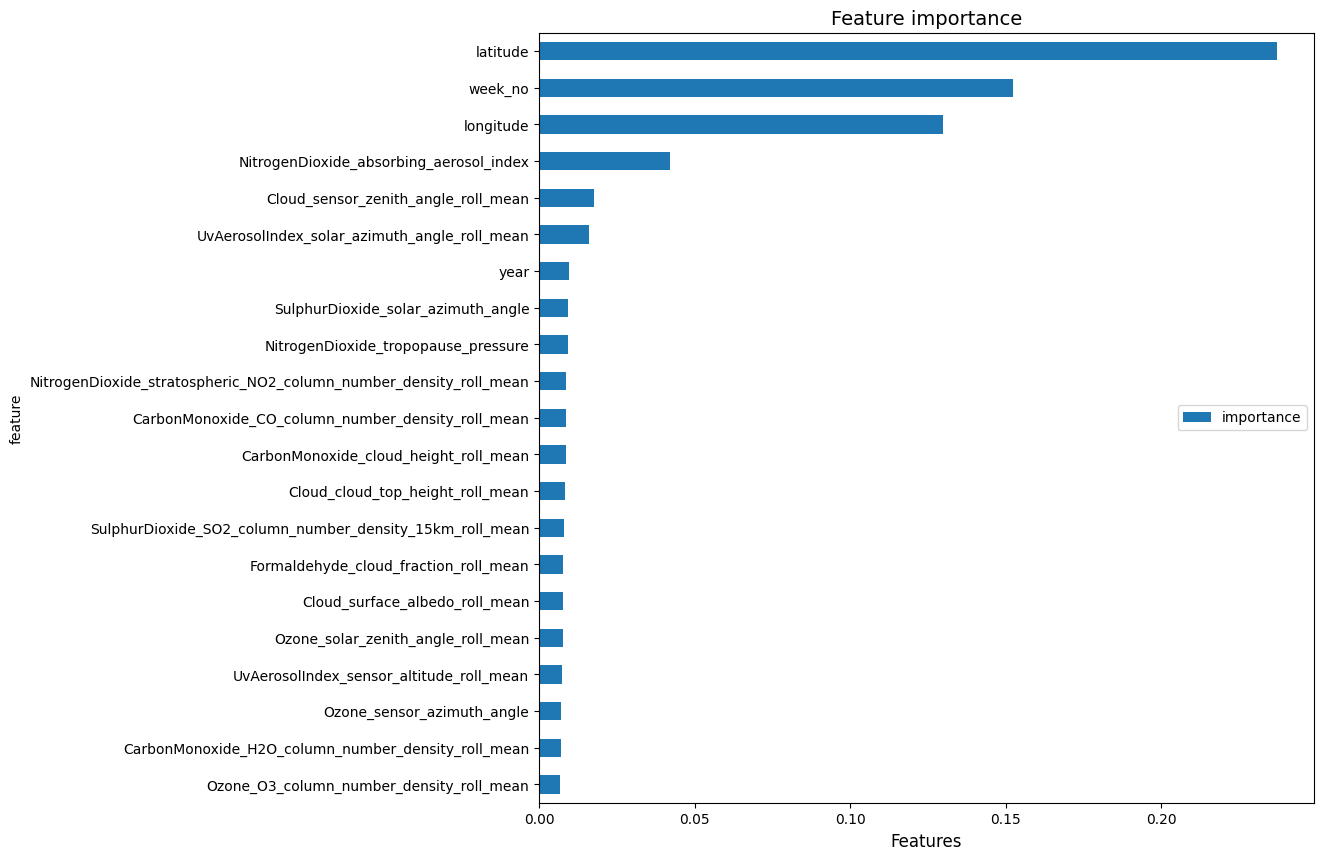

In [32]:
impo_df = pd.DataFrame({'feature': X.columns, 'importance': xgb_reg.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:21].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10))
plt.legend(loc = 'center right')
plt.title('Feature importance', fontsize = 14)
plt.xlabel('Features', fontsize = 12)
plt.show()

In [33]:
test_df = test_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location'], axis = 1)
test_df = test_df.fillna(test_df.median())
predictions = xgb_reg.predict(test_df)

subFile = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': test_eng.ID_LAT_LON_YEAR_WEEK, 'emission': predictions})


In [34]:
subFile.head(20)

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,102.57047
1,ID_-0.510_29.290_2022_01,12.08550
2,ID_-0.510_29.290_2022_02,1.31381
3,ID_-0.510_29.290_2022_03,3.58620
4,ID_-0.510_29.290_2022_04,1.75531
5,ID_-0.510_29.290_2022_05,-0.13731
6,ID_-0.510_29.290_2022_06,4.20053
7,ID_-0.510_29.290_2022_07,-0.85822
8,ID_-0.510_29.290_2022_08,2.56238
9,ID_-0.510_29.290_2022_09,-0.82218


In [35]:
subFile.describe()

,emission
count,24353.00000
mean,84.63587
std,120.24977
min,-37.68251
25%,23.29918
50%,61.83007
75%,118.49015
max,2328.38086


In [36]:
subFile['emission'] = subFile['emission'].abs()
subFile.head(10)

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,102.57047
1,ID_-0.510_29.290_2022_01,12.08550
2,ID_-0.510_29.290_2022_02,1.31381
3,ID_-0.510_29.290_2022_03,3.58620
4,ID_-0.510_29.290_2022_04,1.75531
5,ID_-0.510_29.290_2022_05,0.13731
6,ID_-0.510_29.290_2022_06,4.20053
7,ID_-0.510_29.290_2022_07,0.85822
8,ID_-0.510_29.290_2022_08,2.56238
9,ID_-0.510_29.290_2022_09,0.82218


In [37]:
subFile.to_csv('BaselineSubmission.csv', index = False)